In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", 
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 
                        "DiabetesPedigreeFunction", "Age", "Outcome"])

# Inspect the structure of the dataset
print("Dataset Overview:\n", df.head())
print("\nDataset Info:\n")
df.info()


Dataset Overview:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  

In [2]:

# Handling Missing Values (Replace 0s with NaN in relevant columns)
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_missing:
    df[col].replace(0, np.nan, inplace=True)

# Impute missing values with the median
df.fillna(df.median(), inplace=True)

# Removing duplicate records (if any)
df.drop_duplicates(inplace=True)

# Detecting outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df = df[~outlier_condition.any(axis=1)]


<Figure size 1000x600 with 0 Axes>

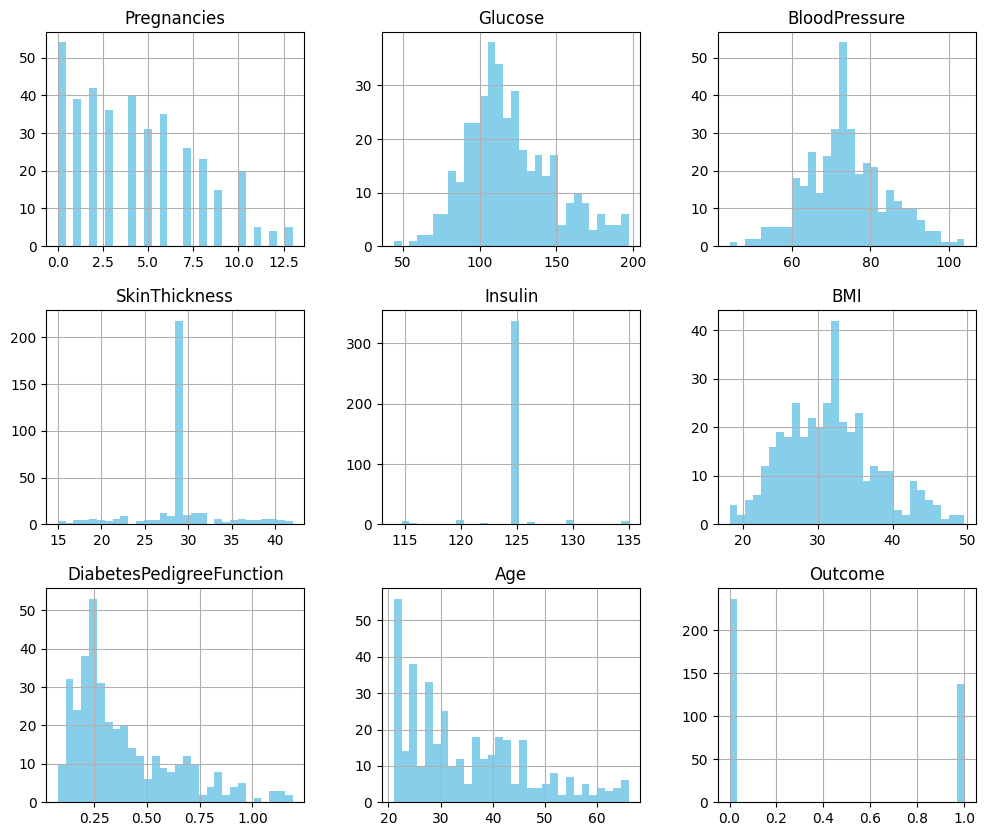

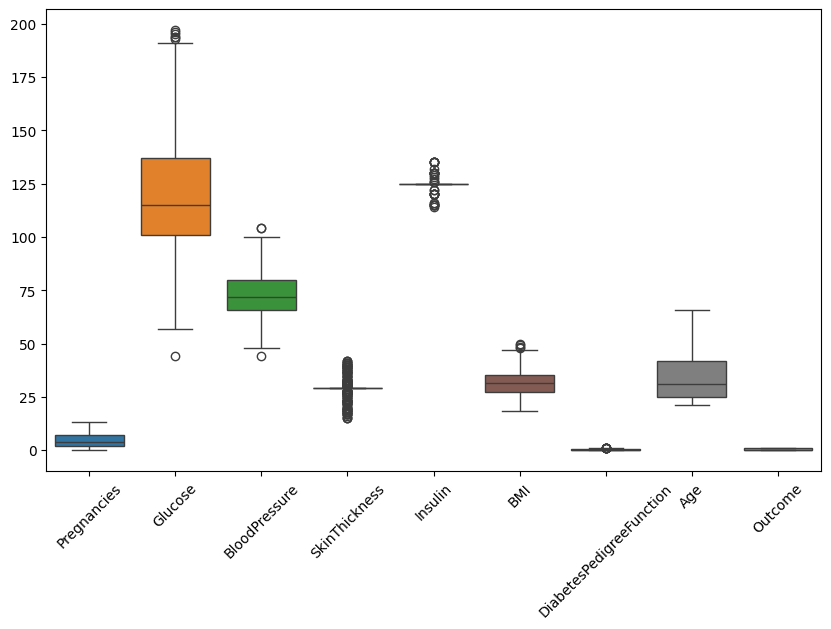

In [3]:

# Univariate Analysis
plt.figure(figsize=(10,6))
df.hist(bins=30, figsize=(12,10), color='skyblue')
plt.show()

# Boxplots to visualize distributions
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


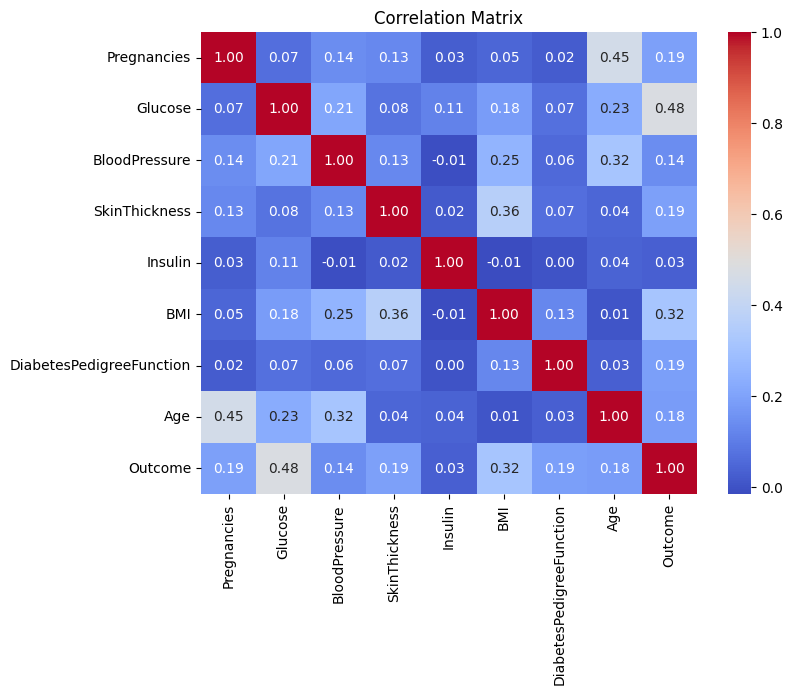

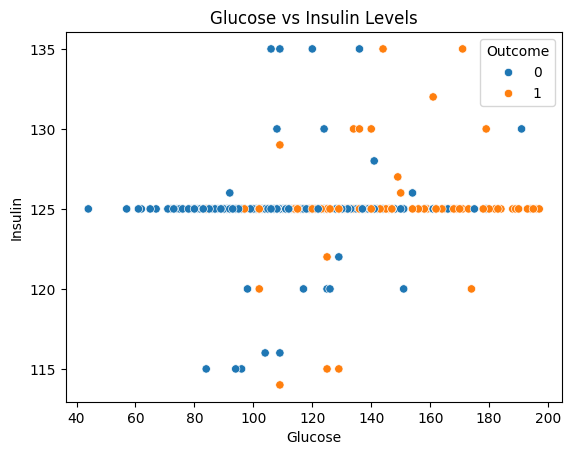

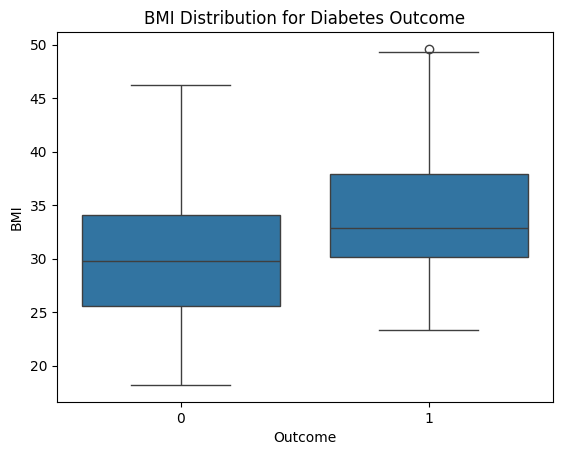

In [4]:

# Bivariate Analysis
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Scatter Plot of Glucose vs. Insulin
sns.scatterplot(x=df["Glucose"], y=df["Insulin"], hue=df["Outcome"])
plt.title("Glucose vs Insulin Levels")
plt.show()

# Boxplot for BMI across Diabetes Outcomes
sns.boxplot(x=df["Outcome"], y=df["BMI"])
plt.title("BMI Distribution for Diabetes Outcome")
plt.show()


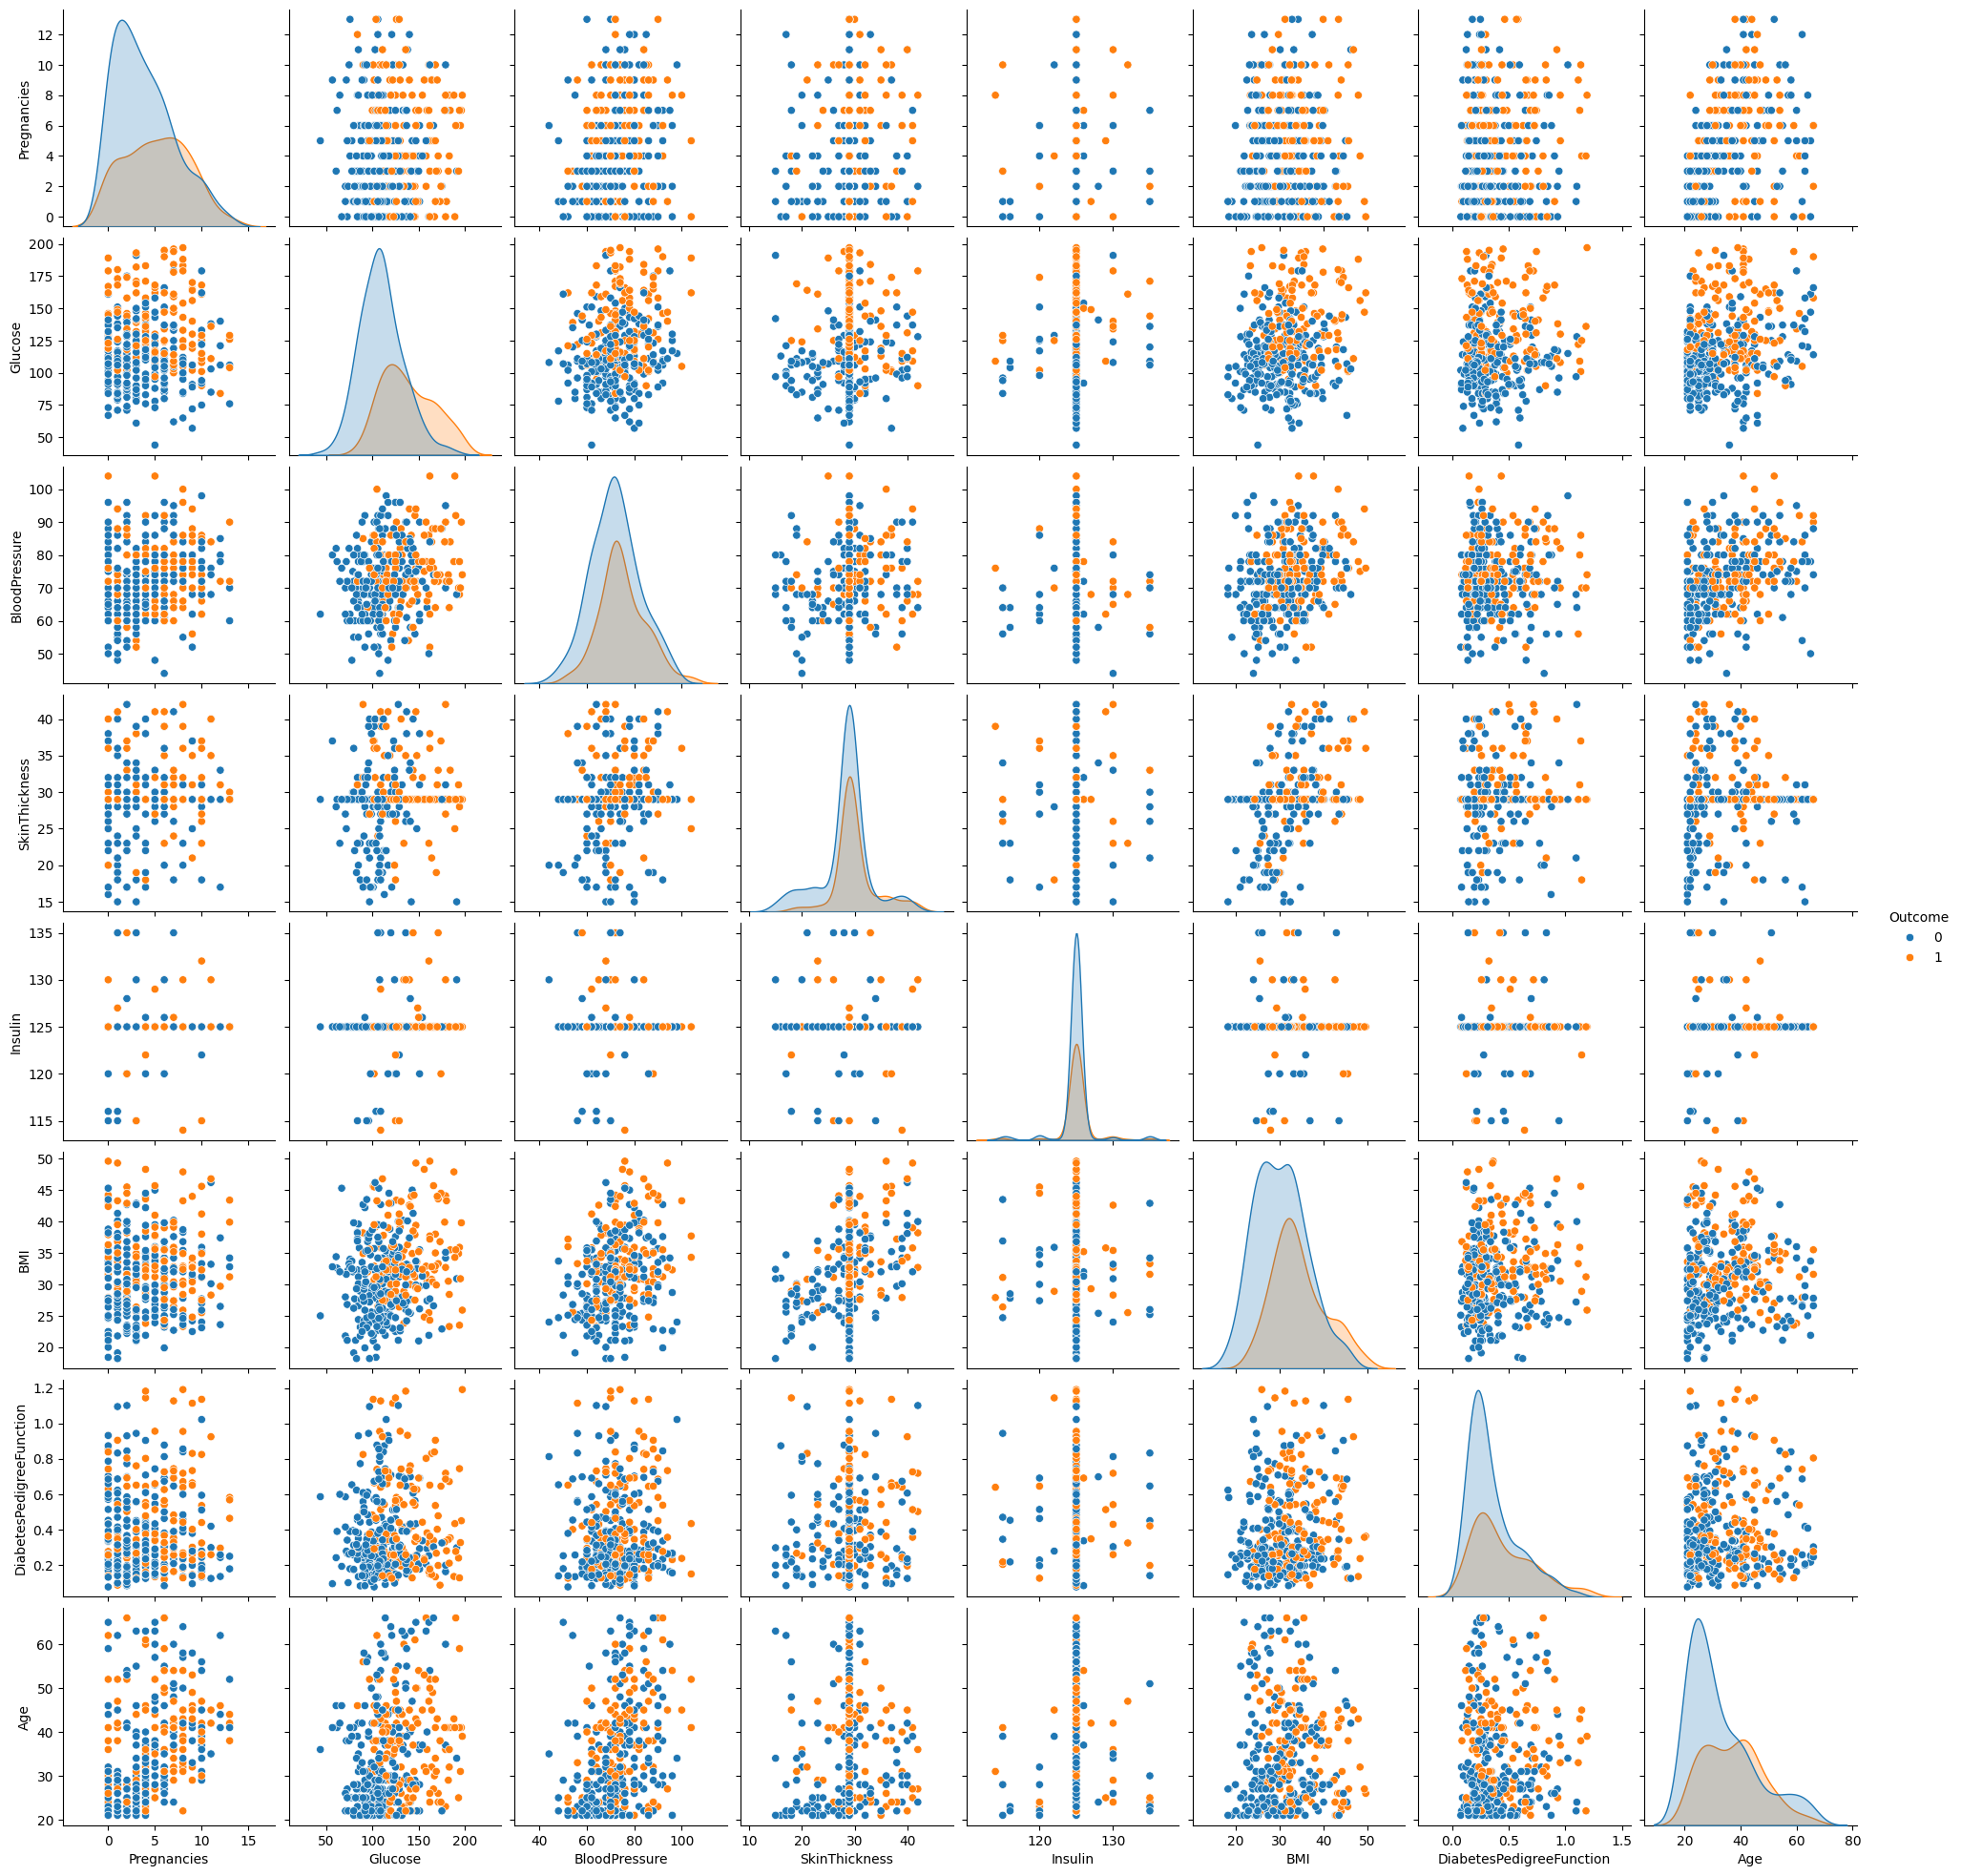


Data Cleaning and EDA Completed Successfully!


In [5]:

# Multivariate Analysis
sns.pairplot(df, hue="Outcome", diag_kind='kde')
plt.show()

print("\nData Cleaning and EDA Completed Successfully!")
